In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

from Utilities import make_oh

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train_2 = np.reshape(x_train,(len(x_train),784))/255
x_test_2 = np.reshape(x_test, (len(x_test),784))/255

In [7]:
y_train_2 = make_oh(y_train)
y_test_2 = make_oh(y_test)

In [8]:
x = tf.placeholder(dtype = tf.float32, shape = (None,784), name = 'x_input')
y = tf.placeholder(dtype = tf.float32, shape = (None,10), name = 'labels')

d = tf.get_variable(name = 'dilation',dtype = tf.float32, initializer=tf.constant(0.2, dtype = tf.float32))
t = tf.get_variable(name = 'translation', dtype = tf.float32, initializer=tf.constant(0.0, dtype = tf.float32))

In [9]:
def wavelet_act(x,d,t):
    x = tf.multiply(d,(x-t))
    return x*tf.exp(-0.5*x**2)

In [10]:
def mexican_hat_wt(x,d,t):
    x = (x-t)
    tf_pi = tf.constant(np.pi,dtype=tf.float32)
    #f = tf.constant(0.1, dtype = tf.float32)
    #return (1-x**2)*tf.exp(-x**2)
    return (1-2*(tf_pi**2)*(d**2)*(x**2))*tf.exp(-(tf_pi**2)*(d**2)*x**2)

In [26]:
check_wt = mexican_hat_wt(x,d,t)

z_1 = tf.layers.Dense(64, activation=None)(x)
a_1 = mexican_hat_wt(z_1,d,t)

logits = tf.layers.Dense(10)(a_1)
y_hat = tf.argmax(tf.nn.softmax(logits),axis = 1)

acc = tf.reduce_mean(tf.cast(tf.equal(y_hat,tf.argmax(y,axis = 1)),dtype = tf.float32))

In [27]:
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits=logits)
optimizer = tf.train.AdamOptimizer()

tr_step = optimizer.minimize(loss)

In [28]:
iters = 500

In [31]:
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for i in range(iters):
        this_acc,_ = sess.run([acc,tr_step],feed_dict = {x:x_train_2,y:y_train_2})
        
        if i%50 == 0:
            this_test_acc = sess.run(acc, feed_dict = {x:x_test_2,y:y_test_2})
            this_d, this_t = sess.run([d,t])
            print('It {:d}:\tTrain Acc {:02.2f}%\n\tTest Acc {:02.2f}%\n'.format(i,this_acc*100,this_test_acc*100))  
            print('d: {:01.2f}, t: {:01.2f}\n'.format(this_d,this_t))
        elif i == iters-1:
            this_test_acc = sess.run(acc, feed_dict = {x:x_test_2,y:y_test_2})
            this_d, this_t = sess.run([d,t])
            print('Final It:\tTrain Acc {:02.2f}%\n\tTest Acc {:02.2f}%'.format(this_acc*100,this_test_acc*100))  
            print('d: {:01.2f}, t: {:01.2f}\n'.format(this_d,this_t))
    
    check_values = np.linspace(-10,10,num = 784)
    check_values = np.reshape(check_values,(1,784))
    
    edo = sess.run(check_wt,feed_dict = {x:check_values})

It 0:	Train Acc 10.00%
	Test Acc 13.71%

d: 0.20, t: -0.00

It 50:	Train Acc 88.08%
	Test Acc 88.98%

d: 0.24, t: 0.01

It 100:	Train Acc 92.16%
	Test Acc 92.37%

d: 0.25, t: 0.01

It 150:	Train Acc 93.76%
	Test Acc 93.68%

d: 0.25, t: 0.01

It 200:	Train Acc 94.73%
	Test Acc 94.46%

d: 0.26, t: 0.02

It 250:	Train Acc 95.48%
	Test Acc 94.91%

d: 0.26, t: 0.02

It 300:	Train Acc 96.08%
	Test Acc 95.16%

d: 0.27, t: 0.02

It 350:	Train Acc 96.58%
	Test Acc 95.54%

d: 0.27, t: 0.02

It 400:	Train Acc 97.04%
	Test Acc 95.83%

d: 0.28, t: 0.02

It 450:	Train Acc 97.41%
	Test Acc 96.00%

d: 0.28, t: 0.02

Final It:	Train Acc 97.74%
	Test Acc 96.13%
d: 0.29, t: 0.02



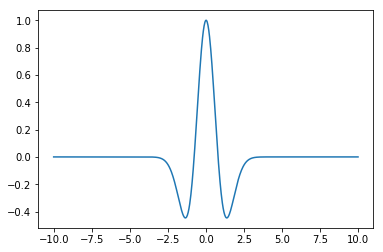

In [32]:
plt.plot(np.reshape(check_values,(784,)),np.reshape(edo,(784,)))